### Import Modules

In [2]:
# -*- coding: utf-8 -*-
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import argparse
import base64
import os,glob
import numpy as np

from googleapiclient import discovery
from oauth2client.client import GoogleCredentials

### Main Function

In [3]:
def label_image(photo_file):
    """Run a label request on a single image"""

    # START authentication
    credentials = GoogleCredentials.get_application_default()
    service = discovery.build('vision', 'v1', credentials=credentials)
    # END authentication

    # START constructing request
    with open(photo_file, 'rb') as image:
        image_content = base64.b64encode(image.read())
        service_request = service.images().annotate(body={
            'requests': [{
                'image': {
                    'content': image_content.decode('UTF-8')
                },
                'features': [{
                    'type': 'LABEL_DETECTION',
                    'maxResults': 5
                }]
            }]
        })
        # END constructing request

        # START parsing response
        response = service_request.execute()
        for results in response['responses']:
            if 'labelAnnotations' in results:
                for annotations in results['labelAnnotations']:
                    print('Predicted Label %s, score = %s' % (annotations['description'], annotations['score']))

                    
def detect_face(photo_file):
    """Run a face detection request on a single image"""
    "https://cloud.google.com/vision/docs/reference/rest/v1/images/annotate"

    # START authentication
    credentials = GoogleCredentials.get_application_default()
    service = discovery.build('vision', 'v1', credentials=credentials)
    # END authentication

    # START constructing request
    with open(photo_file, 'rb') as image:
        image_content = base64.b64encode(image.read())
        service_request = service.images().annotate(body={
            'requests': [{
                'image': {
                    'content': image_content.decode('UTF-8')
                },
                'features': [{
                    'type': 'FACE_DETECTION',
                    'maxResults': 5
                }]
            }]
        })
        # END constructing request

        # START parsing response
        face_position_list = []
        head_position_list = []
        response = service_request.execute()
        for results in response['responses']:
            if 'faceAnnotations' in results:
                for face_id, annotations in enumerate(results['faceAnnotations']):
                    #print('Predicted Label %s, score = %s' % (annotations['description'], annotations['score']))
                    print("======================================")
                    print("Detected Face %d with confidence %f" %(face_id+1, annotations['detectionConfidence']))
                    print("    Joyful : %s" %(annotations['joyLikelihood']))
                    print("    Sorrowful : %s" %(annotations['sorrowLikelihood']))
                    print("    Surpised : %s" %(annotations['surpriseLikelihood']))
                    print("    Angry : %s" %(annotations['angerLikelihood']))
                    face_position_list.append(annotations['fdBoundingPoly']['vertices'])
                    head_position_list.append(annotations['boundingPoly']['vertices'])
                    
            else :
                print("No Face is Detected !!")
        
        
    return face_position_list, head_position_list

### Show Query Image

(-0.5, 1079.5, 719.5, -0.5)

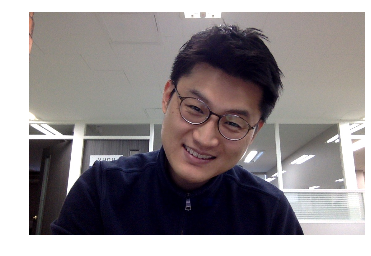

In [11]:
facetime_path = '/Users/Vuno/Pictures/Photo Booth 보관함/Pictures'
file_name = sorted(glob.glob(facetime_path+'/*.jpg'), key=os.path.getmtime)[-1]

img = Image.open(file_name)
plt.imshow(np.asanyarray(img))
plt.axis('off')

### Object Labeling using JSON request and response

In [9]:
label_image(file_name)
#face_positions, head_positions = detect_face(last_image_path)

Predicted Label hair, score = 0.94283205
Predicted Label person, score = 0.92733645
Predicted Label glasses, score = 0.81806195
Predicted Label smile, score = 0.7813305
Predicted Label hairstyle, score = 0.71943325


### Face Detection using JSON request and response

Detected Face 1 with confidence 0.912144
    Joyful : VERY_UNLIKELY
    Sorrowful : VERY_UNLIKELY
    Surpised : VERY_UNLIKELY
    Angry : VERY_UNLIKELY
Detected Face 2 with confidence 0.989908
    Joyful : VERY_UNLIKELY
    Sorrowful : VERY_UNLIKELY
    Surpised : VERY_UNLIKELY
    Angry : POSSIBLE
Detected Face 3 with confidence 0.979314
    Joyful : VERY_UNLIKELY
    Sorrowful : VERY_UNLIKELY
    Surpised : VERY_UNLIKELY
    Angry : VERY_UNLIKELY
Detected Face 4 with confidence 0.543276
    Joyful : VERY_UNLIKELY
    Sorrowful : VERY_UNLIKELY
    Surpised : VERY_UNLIKELY
    Angry : VERY_UNLIKELY


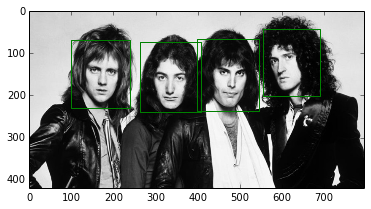

In [14]:
# Set File Path
file_name = './queen.jpeg'
img = Image.open(file_name)

# Send Request using JSON request
face_positions, head_positions = detect_face(file_name)

# Draw Face Detection Result
fig, ax = plt.subplots(1)
ax.imshow(np.asanyarray(img))

for head_pos in head_positions:
    x0 = head_pos[0]['x']
    y0 = head_pos[0]['y']
    width = head_pos[2]['x'] - x0
    height = head_pos[2]['y'] - y0
    rect = patches.Rectangle((x0, y0), width, height, linewidth=1, edgecolor='g', facecolor='none')
    ax.add_patch(rect)
    
plt.show()